Лабораторная №2

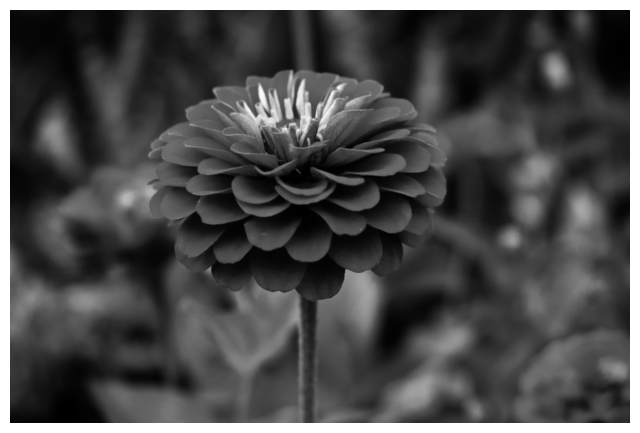

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Загрузка и подготовка изображения
image = cv2.imread('img.jpg') 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

Гауссов шум

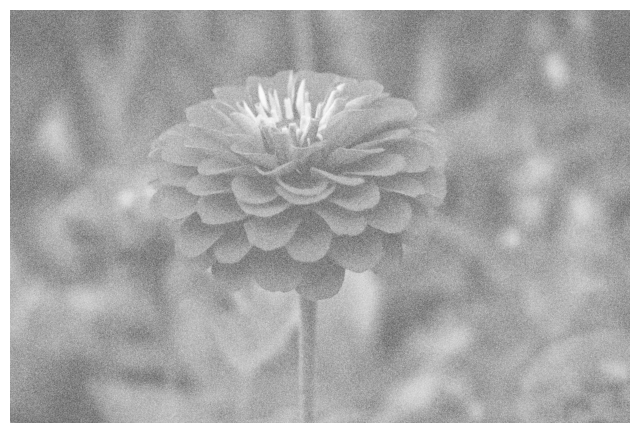

In [5]:
noise_gauss = np.random.normal(0, 30, image_gray.shape).astype(np.uint8)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

plt.figure(figsize=(8, 6))
plt.imshow(image_noise_gauss, cmap='gray')
plt.axis('off')
plt.show()

Равномерный шум

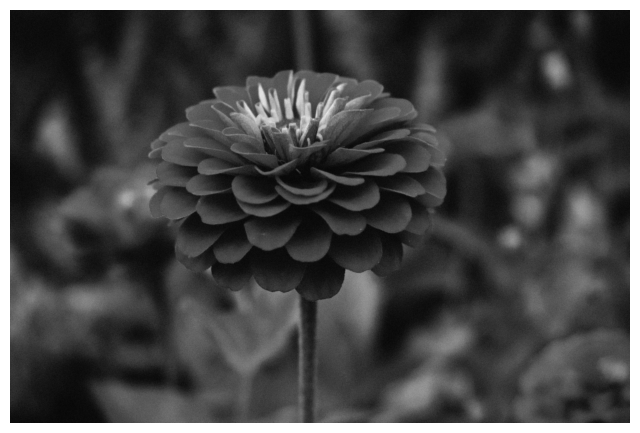

In [6]:
image_uniform = image_gray.copy().astype(np.float32)  

noise_level = 40
uniform_noise = np.random.uniform(-noise_level, noise_level, image_gray.shape)

image_uniform = image_uniform + uniform_noise
image_uniform = np.clip(image_uniform, 0, 255).astype(np.uint8)

plt.figure(figsize=(8, 6))
plt.imshow(image_uniform, cmap='gray')
plt.axis('off')
plt.show()

Медианный фильтр 5x5

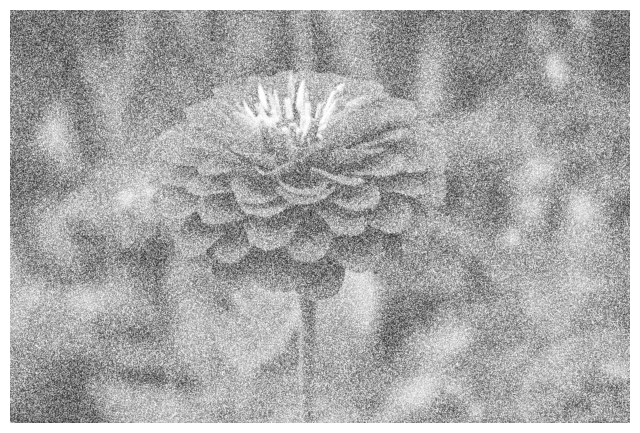

In [8]:
median_gauss = cv2.medianBlur(image_noise_gauss, 5)
plt.figure(figsize=(8, 6))
plt.imshow(median_gauss, cmap='gray')
plt.axis('off')
plt.show()

Гауссов фильтр 5x5


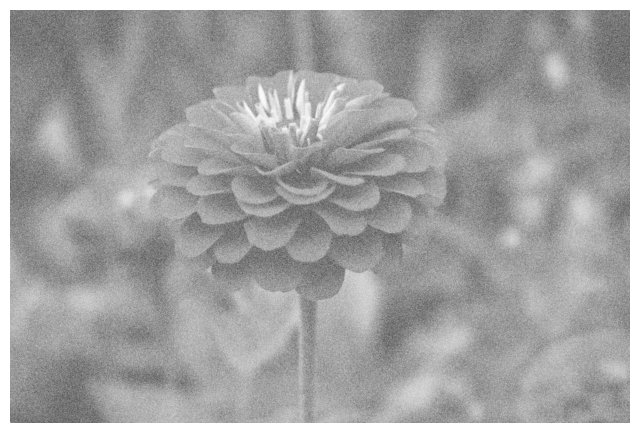

In [9]:
gaussian_gauss = cv2.GaussianBlur(image_noise_gauss, (5, 5), 0)
plt.figure(figsize=(8, 6))
plt.imshow(gaussian_gauss, cmap='gray')
plt.axis('off')
plt.show()

Билатеральный фильтр

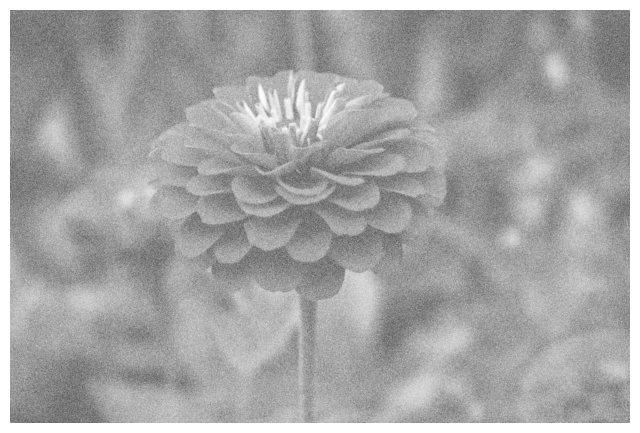

In [10]:
bilateral_gauss = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
plt.figure(figsize=(8, 6))
plt.imshow(bilateral_gauss, cmap='gray')
plt.axis('off')
plt.show()

Фильтр нелокальных средних

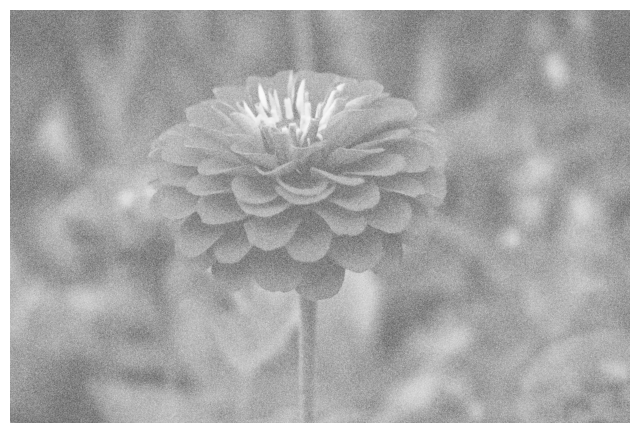

In [11]:
nlm_gauss = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
plt.figure(figsize=(8, 6))
plt.imshow(nlm_gauss, cmap='gray')
plt.axis('off')
plt.show()

Медианный фильтр 5 на 5 для равномерного шума 

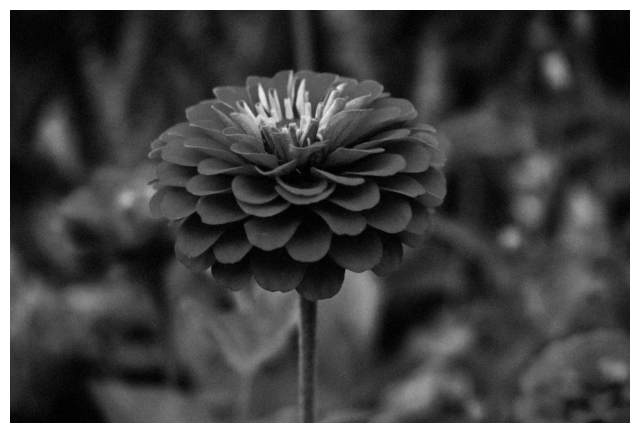

In [16]:
median_uniform = cv2.medianBlur(image_uniform, 5)
plt.figure(figsize=(8, 6))
plt.imshow(median_uniform, cmap='gray')
plt.axis('off')
plt.show()

Гауссов фильтр 5 на 5 для равномерного шума

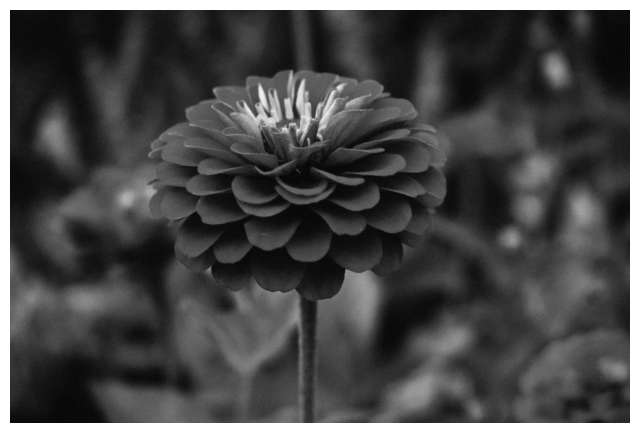

In [18]:
gaussian_uniform = cv2.GaussianBlur(image_uniform, (5, 5), 0)
plt.figure(figsize=(8, 6))
plt.imshow(gaussian_uniform, cmap='gray')
plt.axis('off')
plt.show()

Билатеральный фильтр для равномерного шума

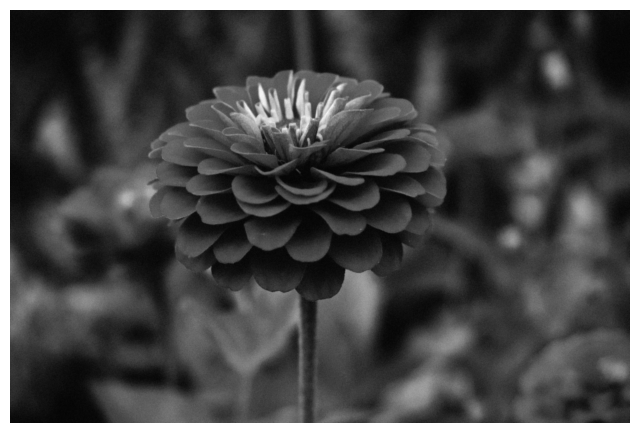

In [19]:
bilateral_uniform = cv2.bilateralFilter(image_uniform, 9, 75, 75)
plt.figure(figsize=(8, 6))
plt.imshow(bilateral_uniform, cmap='gray')
plt.axis('off')
plt.show()

Фильтр нелокальных средних для равномерного шума

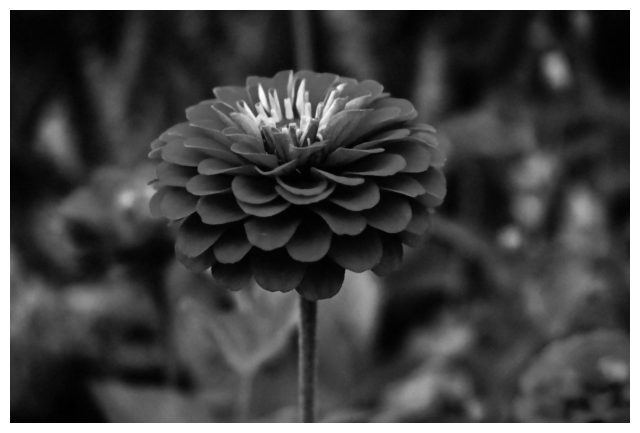

In [20]:
nlm_uniform = cv2.fastNlMeansDenoising(image_uniform, h=20)
plt.figure(figsize=(8, 6))
plt.imshow(nlm_uniform, cmap='gray')
plt.axis('off')
plt.show()

Итоги

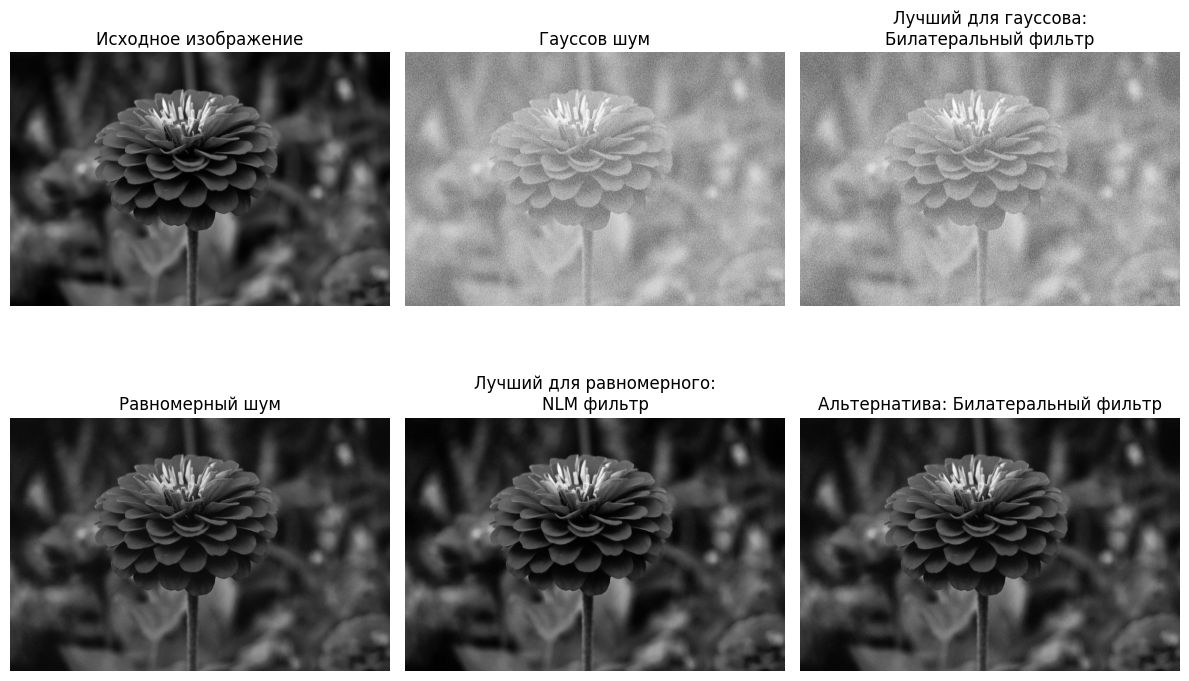

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Гауссов шум')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(bilateral_gauss, cmap='gray')
plt.title('Лучший для гауссова:\nБилатеральный фильтр')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(image_uniform, cmap='gray')
plt.title('Равномерный шум')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(nlm_uniform, cmap='gray')
plt.title('Лучший для равномерного:\nNLM фильтр')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(bilateral_uniform, cmap='gray')
plt.title('Альтернатива: Билатеральный фильтр')
plt.axis('off')

plt.tight_layout()
plt.show()